<a href="https://colab.research.google.com/github/miluseel/MiluseelAI/blob/main/Chap3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3-2. 선형회귀

In [3]:
# k - 최근접 이웃의 한계

#데이터준비

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
#데이터 세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#훈련세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

In [8]:
#최근접 이웃 개수를 3으로 하는 모델 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

#농어 무게 1033으로 예측했는데 엥 실제농어 무게는 더 무겁돈데? 어쩔끈데 내돈

[1033.33333333]


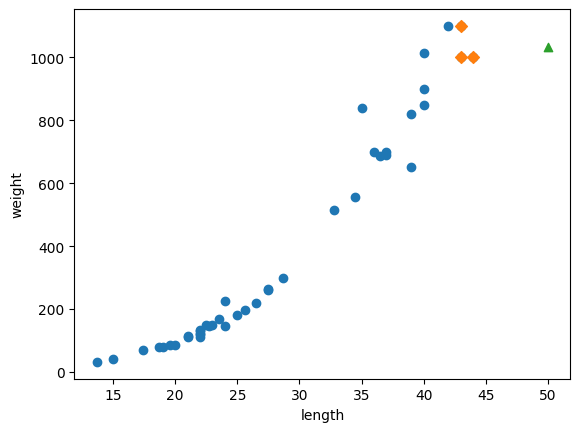

In [12]:
#훈련세트와 50cm농어, 농어의 최근접 이웃 산점도 표시해보자
import matplotlib.pyplot as plt

#50cm 농어의 이웃구하기
distances, indexes = knr.kneighbors([[50]])

#훈련세트의 산점도 그리기
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#길이가 커질수록 농어의 무게가 증가하는 경향
#50cm 농어에서 가장 가까운 것은 45cm근방 - 이 샘플들 무게 평균냅

In [11]:
print(np.mean(train_target[indexes]))
#모델 예측값과 정확히 일치 !

1033.3333333333333


In [13]:
print(knr.predict([[100]]))

[1033.33333333]


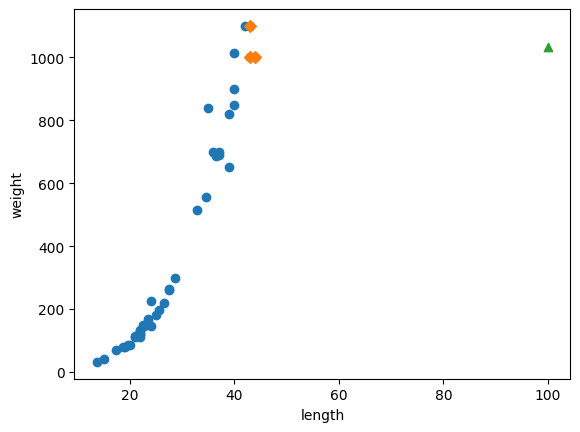

In [15]:
#그래프 다시 그려 확인
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

###선형회귀
  - 사이킷런
    - sklearn.liner_model패키지
      - LinearRegression클래스
      - fit(),score(),predict()메서드 사용 가능

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#선형회귀모델 훈련
lr.fit(train_input, train_target)

#50cm 농어 예측
print(lr.predict([[50]]))

[1241.83860323]


k최근접 이웃회귀에 비해 선형회귀 에서는 농어무게를 아주 높게 측정했네? 왤까? 귱귬하네 <br>
  - 하나의 직선을 그리려면 기울기(a)와 절편(b)이 있어야 됨
  - y= ax+b
  - x:농어길이 , y:농어무게

linear regression에서 찾은 a,b의 lr객체의 coef_(계수 coefficient/ 가중치 weight) , intercept_(절편)속성 저장됨

In [17]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


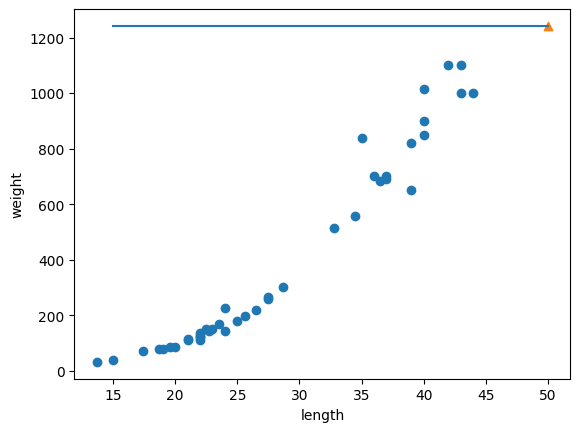

In [19]:
#농어의 길이 15-50직선 그려보면,
#기울기, 절편 사용하여
#(15, 15*39-709) ,(50,50*39-709) 두점 이은 것

#산점도 함 그려보겠슴더
plt.scatter(train_input, train_target)

#15-50까지 1차방정식 그래프 그려보겠슴더
plt.plot([15, 50], [50*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#여기서 찾은 직선이 선형회귀 알고리즘이 이 데이터 셋에서 찾은 최적의 직선!
#길이 50인 농어 예측이 이 직선의 연장선상에 있으므로 성공 ! 이제 예측됨

In [22]:
#결정계수 확인해 보자
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#근데 뭔가이상. 훈련세트랑 데이터 세트 점수가 좀 차이가 남.. 과대적합? 근데 훈련세트점수도 높지않음. 오히려 과소적합임.. 알람 !!!!
#최적의 직선이 아닌, 최적의 곡선을 찾아야 한다 !!

0.939846333997604
0.8247503123313558


###다항회귀
  - 최적의 곡선 찾기 !
  - column_stack()이용하여 train_input제곱과 train_input두배열 나란히 붙이기! (test_input도 동일)

In [25]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape,test_poly.shape) #열 2개로 늘어남

(42, 2) (14, 2)


In [27]:
#다시 선형회귀 모델 돌려보겠음
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [28]:
#계수와 절편 출력
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


학습한 그래프 식 : 무게 = 1.01 * 길이**2 -21.6 * 길이 +116.05

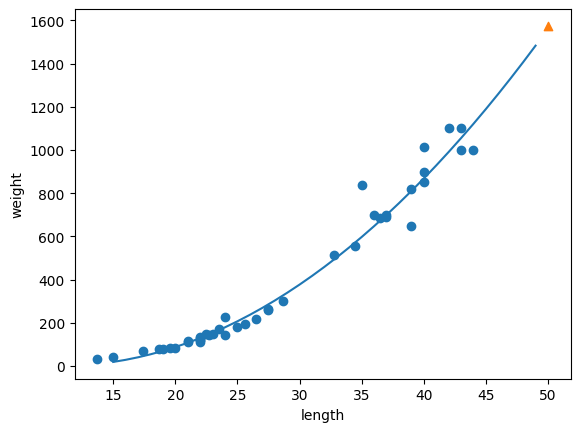

In [30]:
#이제 계수, 절편 다 알아씅니 산점도 다시 그려 봅세다
point=np.arange(15,50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 -21.6*point +116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#우와 짝짝짝

In [31]:
#그럼 결정계수를 평가해볼까?
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

#점수 많이 올라갔네 아주 좋았으
#그런데 테스트 세트가 그대로 좀 더 높다.. 아직 과소적합이 남아있나봐. 더 복잡한 모델 필요할 것 같음 휴

0.9706807451768623
0.9775935108325122


###<문제해결과정 복기 - 선형회귀로 훈련세트 범위 밖의 샘플 예측><br>

최근접 이웃회귀로 예측했을 때는 훈련 세트 범위 밖의 샘플을 예측 할 수 없다는 단점이 있다. -> 선형회귀로 보완해보자<br>

선형회귀는 훈련세트에 잘 맞는 직선 방정식 찾기! <br>
  - LinearRegression클래스 사용하면 동일한 방식으로 훈련, 예측가능
  - coef_, intercept속성으로 최적의 기울기와 절편 구하기

선형회귀를 사용했을 땐 훈련세트에서 벗어난 범위도 잘 예측했지만.. 음수일 수도 있는 불가능한 상태 가능 -> 다항회귀 사용으로 보완해보자<br>
  - 새로운 데이터를 (농어길이)제곱하여 훈련세트에 추가한 다음 선형 회귀모델 다시 훈련
  - 2차방정식 그래프 형태를 학습하여 단순 선형회귀보다 더 높아졌다
  - 하지만 아직 과소적합의 경향이 남아있음

###<함수 리마인드>
scikit_learn
  - LinearRegression :선형회귀 클래스
    - fit_intercept매개변수를 false로 지정하면 절편학습 하지 않음 ( 매개변수 기본값 : True )
    - coef_속성 : 특성에 대한 계수를 포함한 배열 ( 배열의 크기는 특성의 개수와 같음 )
    - intercept_ 속성 : 절편저장



+모델 파라미터 : 선형회귀에서 찾은 가중치처럼 머신러닝 모델이 특성에서 학습한 파라미터